<a href="https://colab.research.google.com/github/v-ibarra/Series_de_tiempo_ATP/blob/main/Series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install dfply
print('Done')

     |████████████████████████████████| 612 kB 4.1 MB/s 
Done


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd
from dfply import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pltimport 
import matplotlib.colors
import dfply

print('Libraries Ready')

Libraries Ready


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tesis/SIMET_REAL_2016_2020.csv')
df

,ESTACION,ZC,API,FECHA,TEMPERATURA,TEMPERATURA_APARENTE,PRECIPITACION,NUBOSIDAD,HUMEDAD,RADIACION
0,F0762,Hermosillo,WeatherBit,01/01/2016 00:00,1.8,-2.8,0.0,64.0,65.0,0.0
1,F0762,Hermosillo,WeatherBit,01/01/2016 01:00,0.6,-3.5,0.0,36.0,71.0,0.0
2,F0762,Hermosillo,WeatherBit,01/01/2016 02:00,1.7,-1.6,0.0,1.0,66.0,0.0
3,F0762,Hermosillo,WeatherBit,01/01/2016 03:00,0.6,-2.6,0.0,0.0,75.0,0.0
4,F0762,Hermosillo,WeatherBit,01/01/2016 04:00,-1.1,-4.2,0.0,0.0,81.0,0.0
...,...,...,...,...,...,...,...,...,...,...
428155,MMMZ,Mazatlan,WeatherBit,18/11/2020 19:00,NaN,NaN,0.0,NaN,NaN,0.0
428156,MMMZ,Mazatlan,WeatherBit,18/11/2020 20:00,NaN,NaN,0.0,NaN,NaN,0.0
428157,MMMZ,Mazatlan,WeatherBit,18/11/2020 21:00,NaN,NaN,0.0,NaN,NaN,0.0
428158,MMMZ,Mazatlan,WeatherBit,18/11/2020 22:00,NaN,NaN,0.0,NaN,NaN,0.0


In [20]:
df_hmo = df[df['ZC']=='Hermosillo']
df_hmo

,ESTACION,ZC,API,FECHA,TEMPERATURA,TEMPERATURA_APARENTE,PRECIPITACION,NUBOSIDAD,HUMEDAD,RADIACION
0,F0762,Hermosillo,WeatherBit,01/01/2016 00:00,1.8,-2.8,0.0,64.0,65.0,0.0
1,F0762,Hermosillo,WeatherBit,01/01/2016 01:00,0.6,-3.5,0.0,36.0,71.0,0.0
2,F0762,Hermosillo,WeatherBit,01/01/2016 02:00,1.7,-1.6,0.0,1.0,66.0,0.0
3,F0762,Hermosillo,WeatherBit,01/01/2016 03:00,0.6,-2.6,0.0,0.0,75.0,0.0
4,F0762,Hermosillo,WeatherBit,01/01/2016 04:00,-1.1,-4.2,0.0,0.0,81.0,0.0
...,...,...,...,...,...,...,...,...,...,...
42811,F0762,Hermosillo,WeatherBit,18/11/2020 19:00,NaN,NaN,0.0,NaN,NaN,0.0
42812,F0762,Hermosillo,WeatherBit,18/11/2020 20:00,NaN,NaN,0.0,NaN,NaN,0.0
42813,F0762,Hermosillo,WeatherBit,18/11/2020 21:00,NaN,NaN,0.0,NaN,NaN,0.0
42814,F0762,Hermosillo,WeatherBit,18/11/2020 22:00,NaN,NaN,0.0,NaN,NaN,0.0


In [21]:
df_hmo.dtypes

ESTACION                 object
ZC                       object
API                      object
FECHA                    object
TEMPERATURA             float64
TEMPERATURA_APARENTE    float64
PRECIPITACION           float64
NUBOSIDAD               float64
HUMEDAD                 float64
RADIACION               float64
dtype: object

In [22]:
df_hmo['FECHA'] = pd.to_datetime(df_hmo['FECHA'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
df_hmo.dtypes

ESTACION                        object
ZC                              object
API                             object
FECHA                   datetime64[ns]
TEMPERATURA                    float64
TEMPERATURA_APARENTE           float64
PRECIPITACION                  float64
NUBOSIDAD                      float64
HUMEDAD                        float64
RADIACION                      float64
dtype: object

In [24]:
df_hmo.isna().sum()

ESTACION                  0
ZC                        0
API                       0
FECHA                     0
TEMPERATURA             253
TEMPERATURA_APARENTE    976
PRECIPITACION             0
NUBOSIDAD                11
HUMEDAD                 755
RADIACION                 0
dtype: int64

In [26]:
df_hmo = df_hmo.drop(['ESTACION','ZC','API'], axis=1)
df_hmo.head()

,FECHA,TEMPERATURA,TEMPERATURA_APARENTE,PRECIPITACION,NUBOSIDAD,HUMEDAD,RADIACION
0,2016-01-01 00:00:00,1.8,-2.8,0.0,64.0,65.0,0.0
1,2016-01-01 01:00:00,0.6,-3.5,0.0,36.0,71.0,0.0
2,2016-01-01 02:00:00,1.7,-1.6,0.0,1.0,66.0,0.0
3,2016-01-01 03:00:00,0.6,-2.6,0.0,0.0,75.0,0.0
4,2016-01-01 04:00:00,-1.1,-4.2,0.0,0.0,81.0,0.0


In [30]:
df_hmo = df_hmo.dropna(axis=0)

In [31]:
df_hmo.isna().sum()

FECHA                   0
TEMPERATURA             0
TEMPERATURA_APARENTE    0
PRECIPITACION           0
NUBOSIDAD               0
HUMEDAD                 0
RADIACION               0
dtype: int64

In [32]:
import matplotlib.pyplot as plt

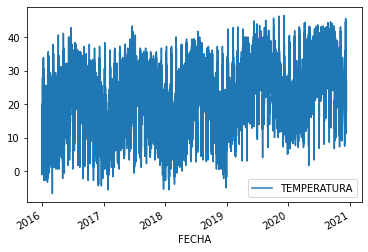

In [33]:
df_hmo.plot(x="FECHA", y="TEMPERATURA")

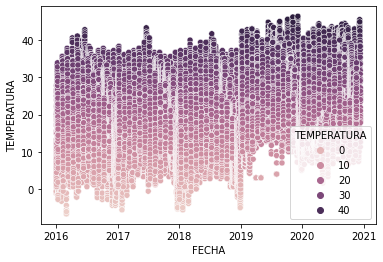

In [34]:
sns.scatterplot(x="FECHA", y="TEMPERATURA", hue='TEMPERATURA', data=df_hmo)

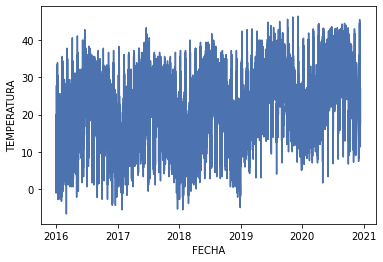

In [39]:
sns.lineplot(x="FECHA", y="TEMPERATURA", data=df_hmo)

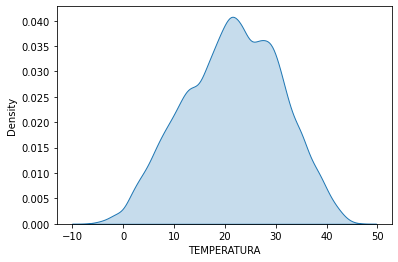

In [37]:
sns.kdeplot(data=df_hmo['TEMPERATURA'], shade=True)

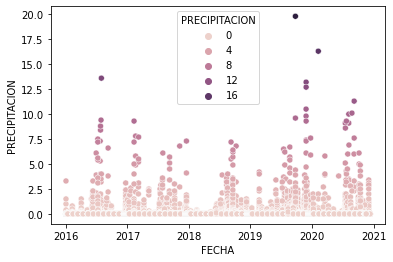

In [42]:
sns.scatterplot(x="FECHA", y="PRECIPITACION", hue='PRECIPITACION', data=df_hmo)

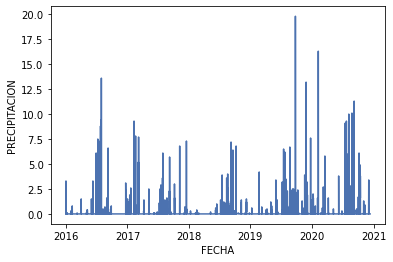

In [40]:
sns.lineplot(x="FECHA", y="PRECIPITACION", data=df_hmo)

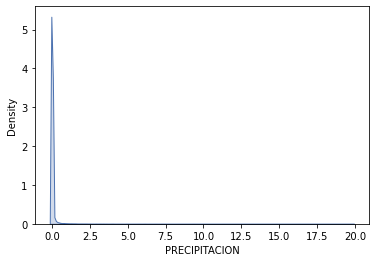

In [41]:
sns.kdeplot(data=df_hmo['PRECIPITACION'], shade=True)

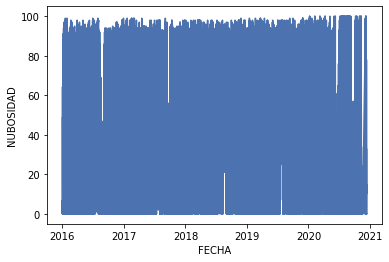

In [43]:
sns.lineplot(x="FECHA", y="NUBOSIDAD", data=df_hmo)

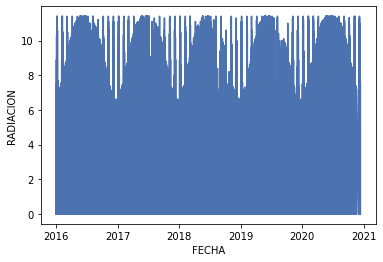

In [44]:
sns.lineplot(x="FECHA", y="RADIACION", data=df_hmo)

In [45]:
df_hmo2019 = df_hmo[(df_hmo['FECHA'] >= '2019-01-01') & (df_hmo['FECHA'] < '2020-01-01')]
#df = df[(df['closing_price'] >= 99) & (df['closing_price'] <= 101)]

In [46]:
df_hmo2019.head()

,FECHA,TEMPERATURA,TEMPERATURA_APARENTE,PRECIPITACION,NUBOSIDAD,HUMEDAD,RADIACION
26304,2019-01-01 00:00:00,11.0,11.0,0.0,74.0,66.0,0.0
26305,2019-01-01 01:00:00,10.0,10.0,0.0,83.0,66.0,0.0
26306,2019-01-01 02:00:00,10.0,10.0,0.0,74.0,57.0,0.0
26307,2019-01-01 03:00:00,10.0,10.0,0.0,69.0,57.0,0.0
26308,2019-01-01 04:00:00,10.0,10.0,0.0,56.0,57.0,0.0


In [47]:
df_hmo2019.tail()

,FECHA,TEMPERATURA,TEMPERATURA_APARENTE,PRECIPITACION,NUBOSIDAD,HUMEDAD,RADIACION
35059,2019-12-31 19:00:00,15.3,15.3,0.0,54.0,87.0,0.0
35060,2019-12-31 20:00:00,15.1,15.1,0.0,56.0,87.0,0.0
35061,2019-12-31 21:00:00,15.0,15.0,0.0,66.0,87.0,0.0
35062,2019-12-31 22:00:00,14.7,14.7,0.0,75.0,87.0,0.0
35063,2019-12-31 23:00:00,12.5,12.5,0.0,78.0,87.0,0.0


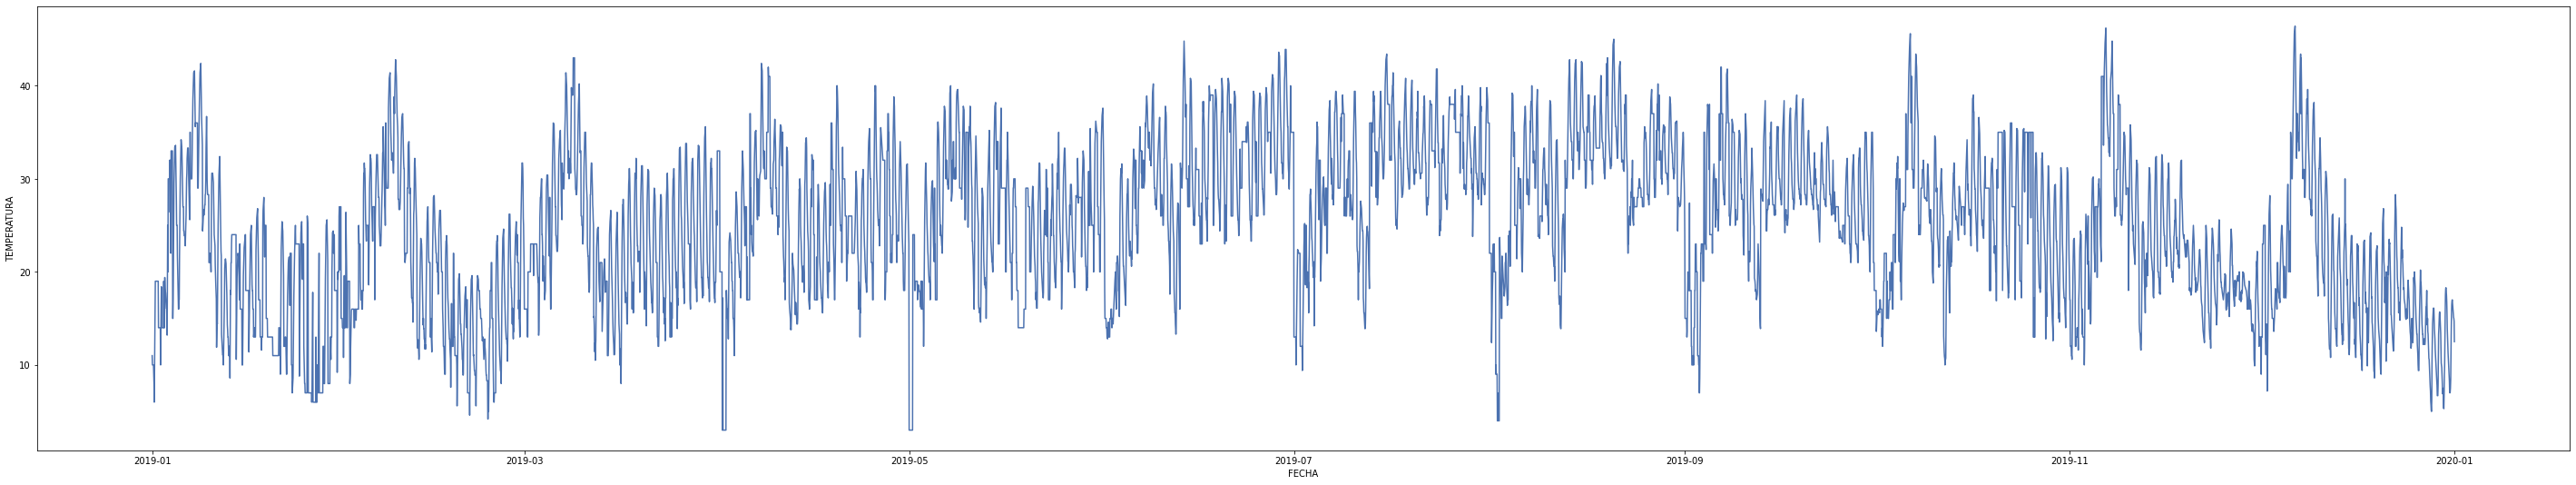

In [55]:
plt.figure(figsize=(50,9))
sns.lineplot(x="FECHA", y="TEMPERATURA", data=df_hmo2019)

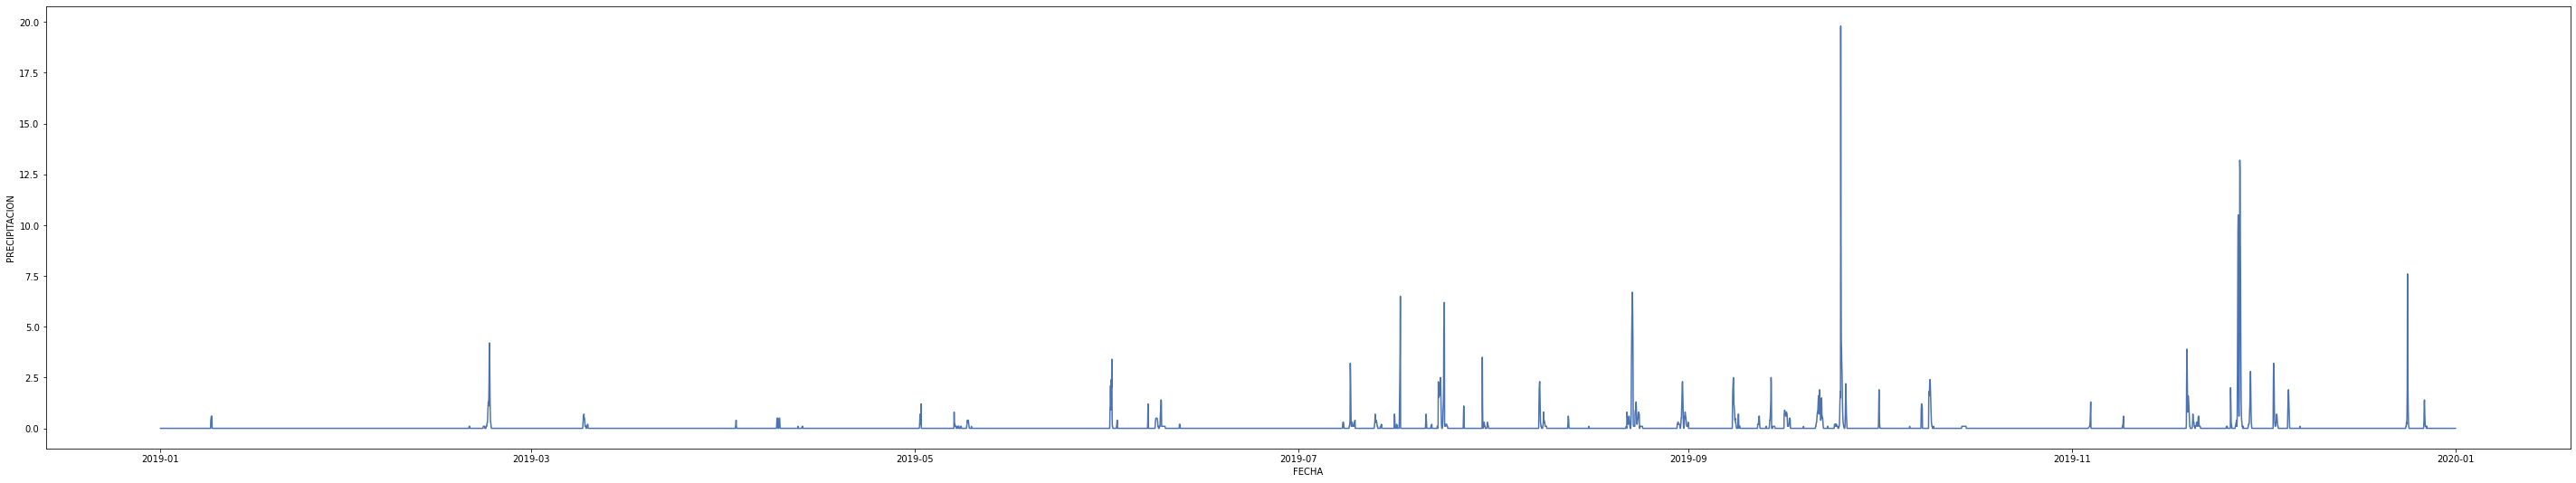

In [56]:
plt.figure(figsize=(50,9))
sns.lineplot(x="FECHA", y="PRECIPITACION", data=df_hmo2019)

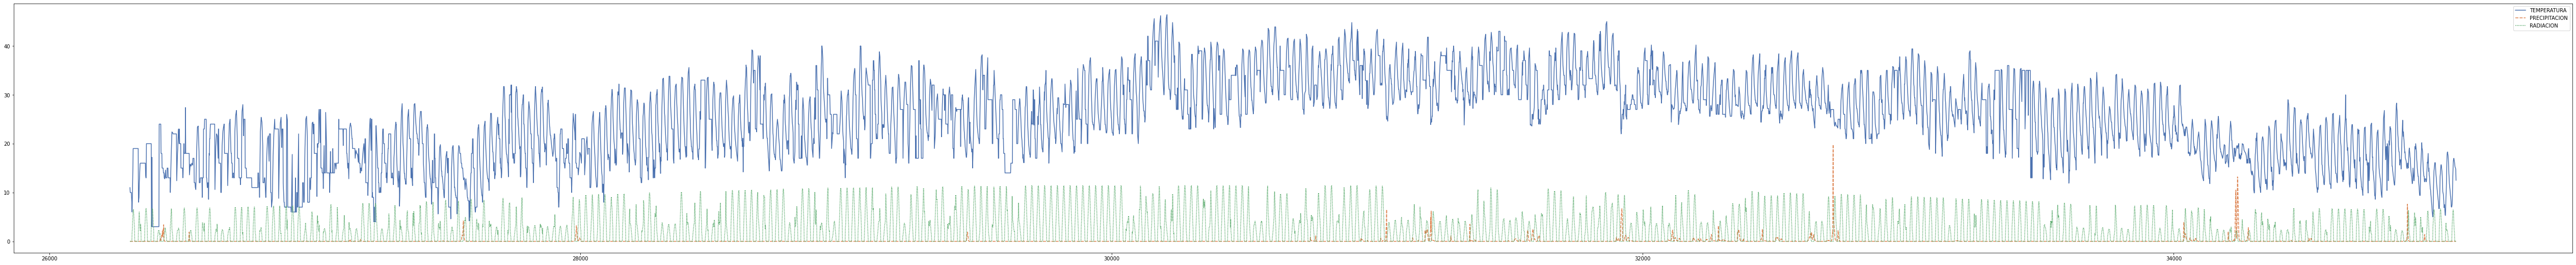

In [64]:
df_hmo2019_ = df_hmo2019.drop(['TEMPERATURA_APARENTE','NUBOSIDAD','HUMEDAD'], axis=1)
plt.figure(figsize=(90,9))
sns.lineplot(data = df_hmo2019_)

In [59]:
df_hmo2019_.head()

,FECHA,TEMPERATURA,PRECIPITACION,HUMEDAD,RADIACION
26304,2019-01-01 00:00:00,11.0,0.0,66.0,0.0
26305,2019-01-01 01:00:00,10.0,0.0,66.0,0.0
26306,2019-01-01 02:00:00,10.0,0.0,57.0,0.0
26307,2019-01-01 03:00:00,10.0,0.0,57.0,0.0
26308,2019-01-01 04:00:00,10.0,0.0,57.0,0.0


In [60]:
df_hmo2019_.set_index('FECHA')

,TEMPERATURA,PRECIPITACION,HUMEDAD,RADIACION
FECHA,,,,
2019-01-01 00:00:00,11.0,0.0,66.0,0.0
2019-01-01 01:00:00,10.0,0.0,66.0,0.0
2019-01-01 02:00:00,10.0,0.0,57.0,0.0
2019-01-01 03:00:00,10.0,0.0,57.0,0.0
2019-01-01 04:00:00,10.0,0.0,57.0,0.0
...,...,...,...,...
2019-12-31 19:00:00,15.3,0.0,87.0,0.0
2019-12-31 20:00:00,15.1,0.0,87.0,0.0
2019-12-31 21:00:00,15.0,0.0,87.0,0.0
